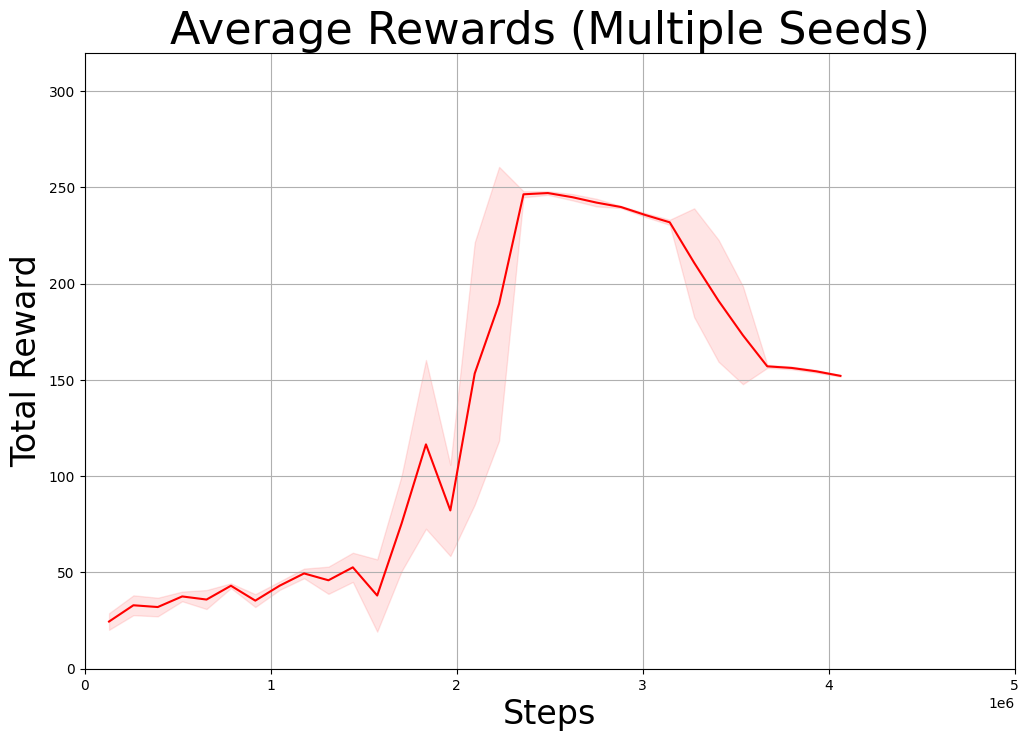

{'id': <visualiser.core.ExperimentVisualise object at 0x000002CA649009E0>, 'color': 'r', 'show': True, 'label': 'offline_td3_hptest_tupdeq_20_npiepochseq_20'}


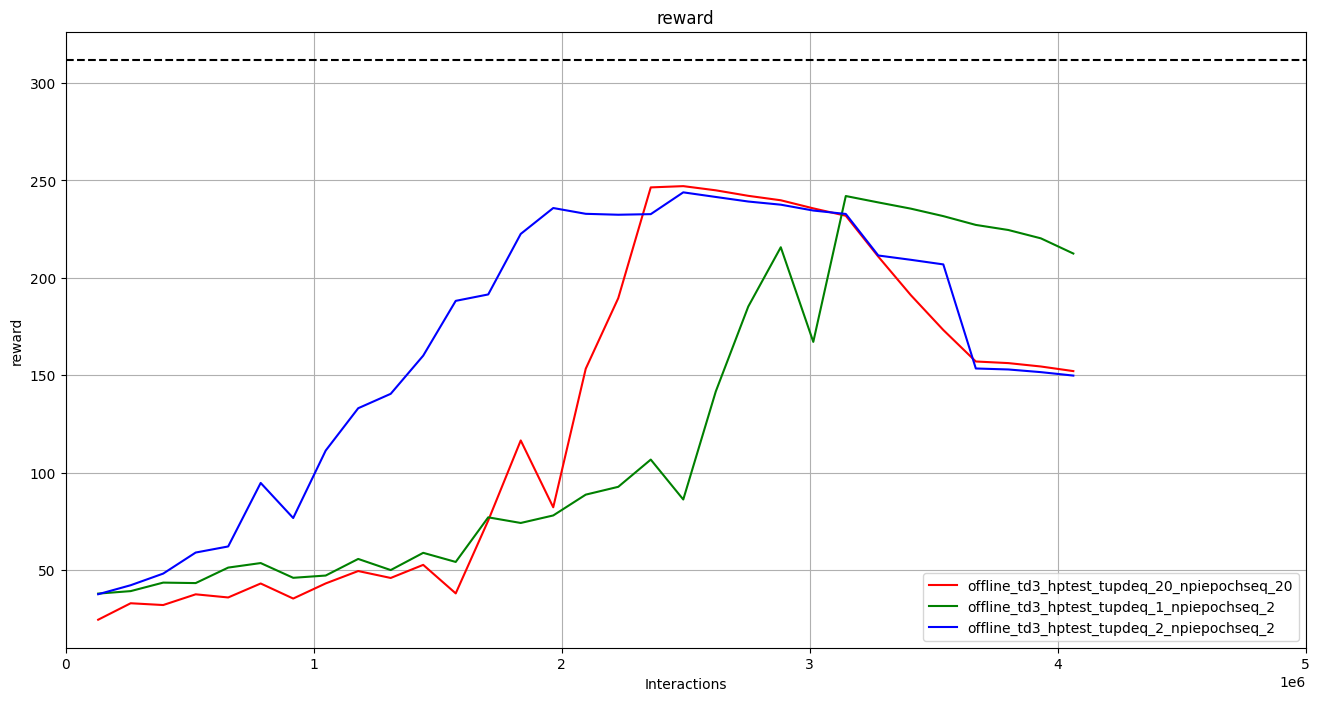

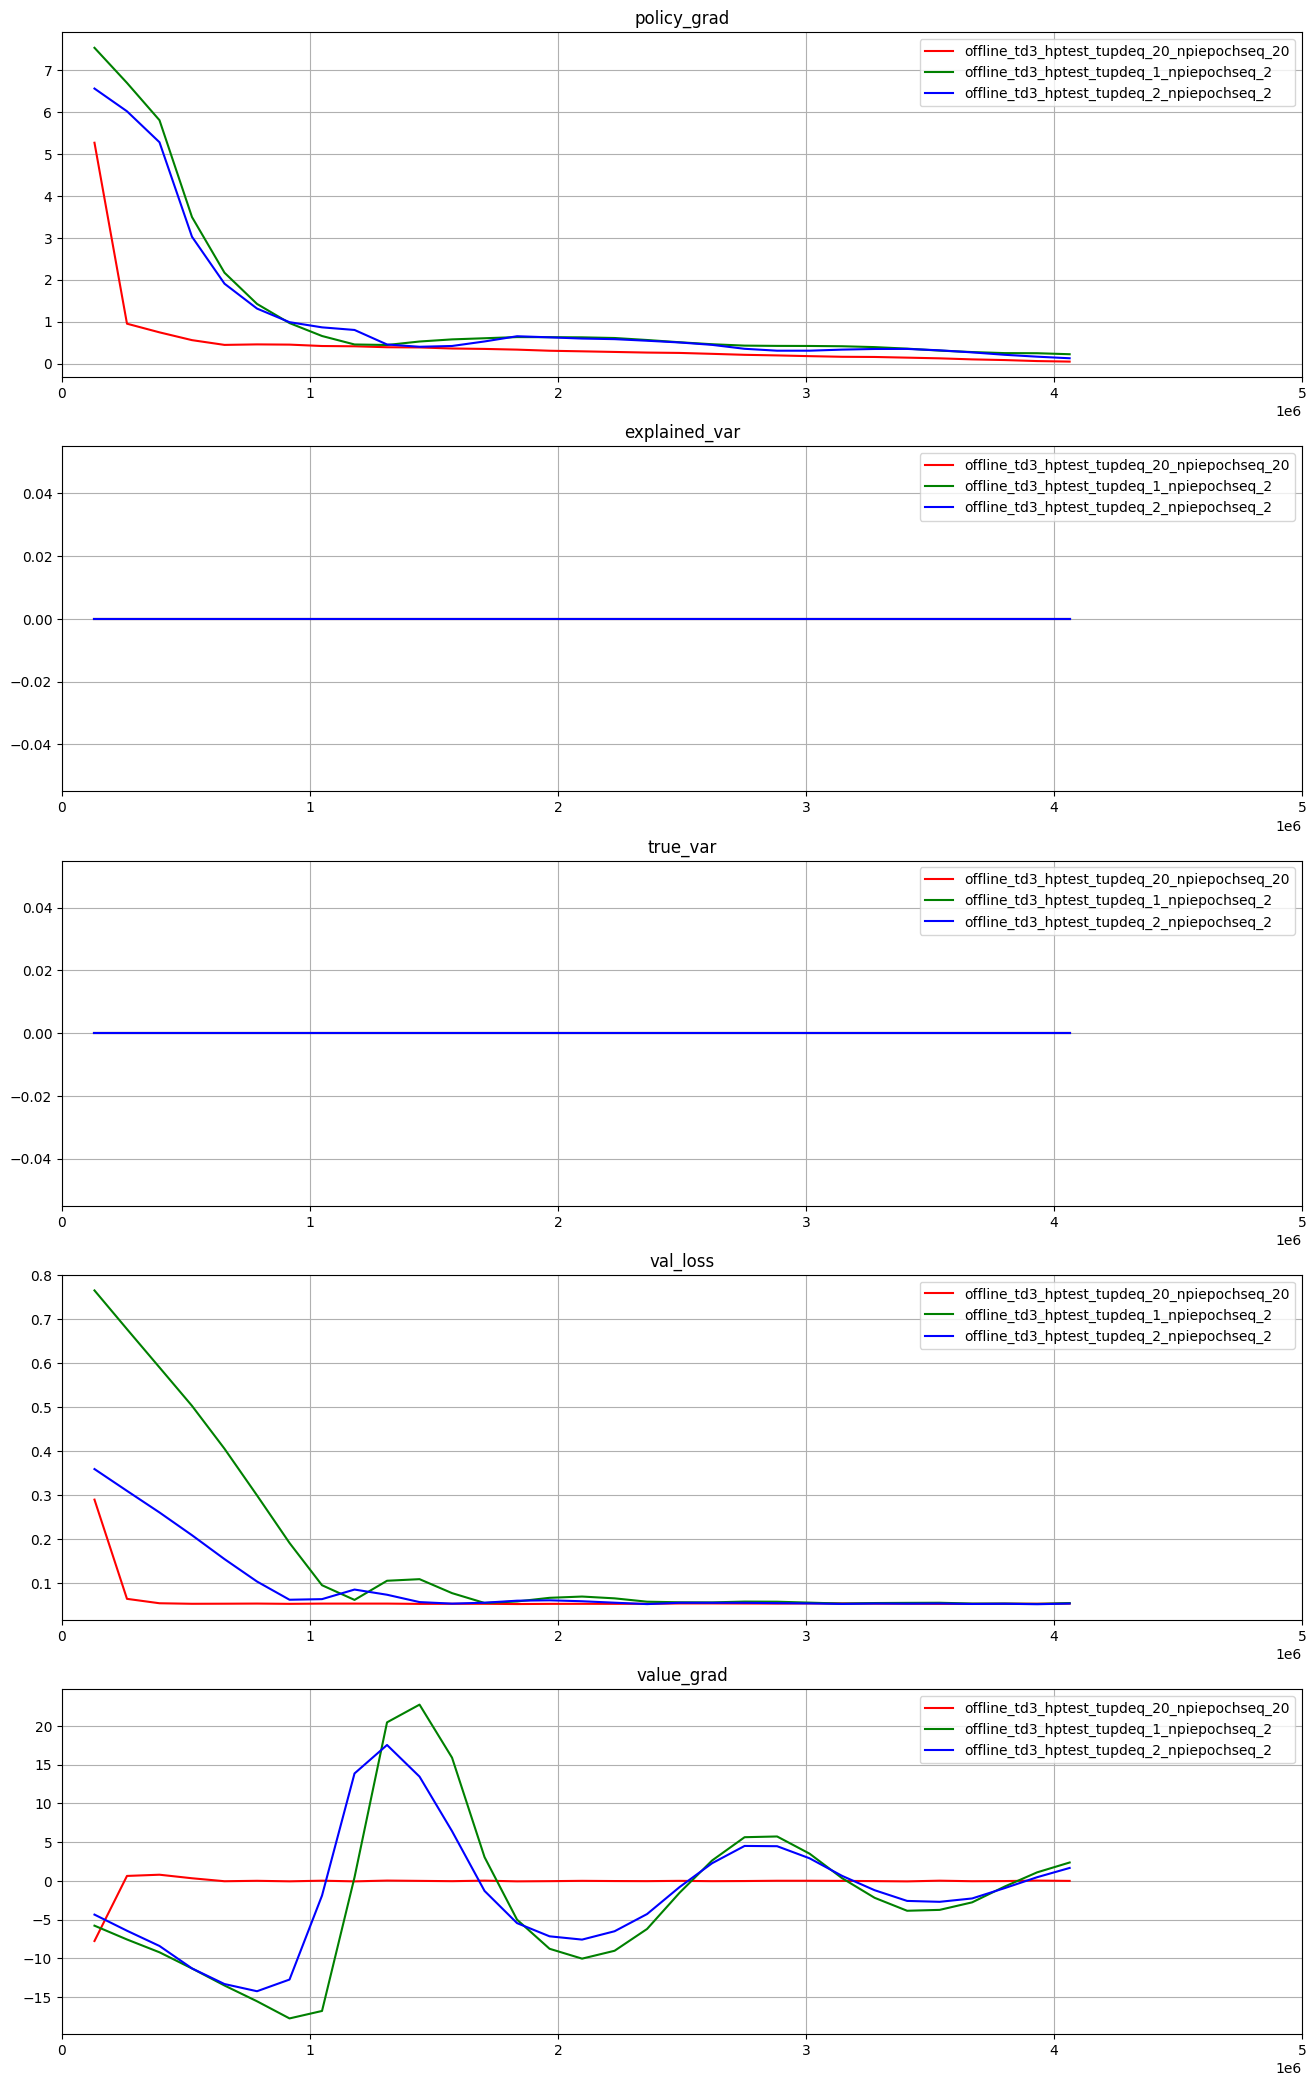

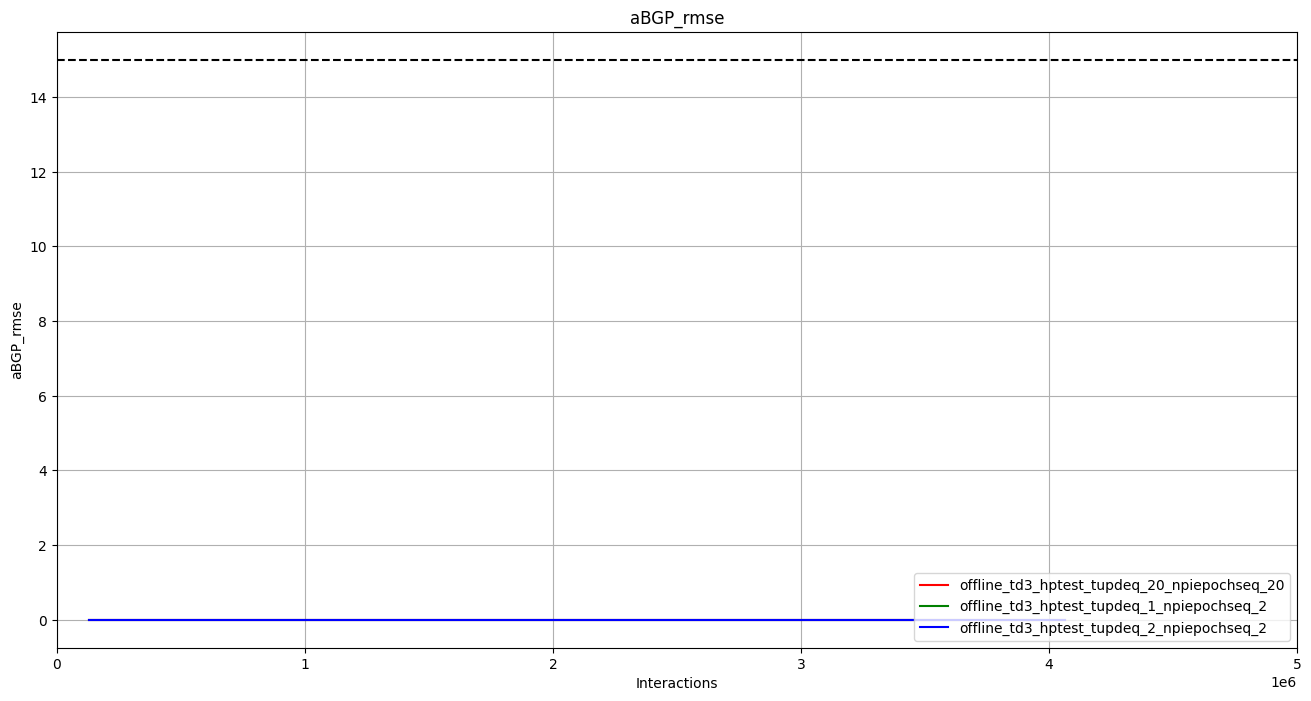

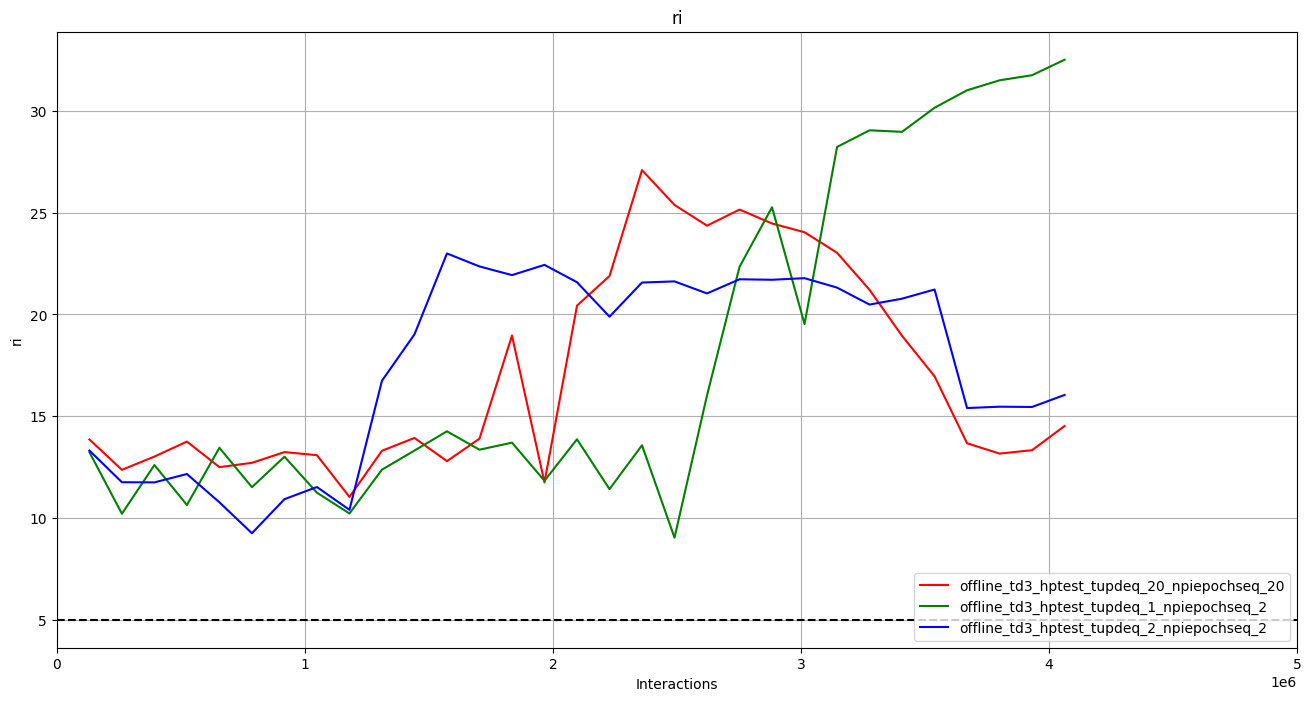

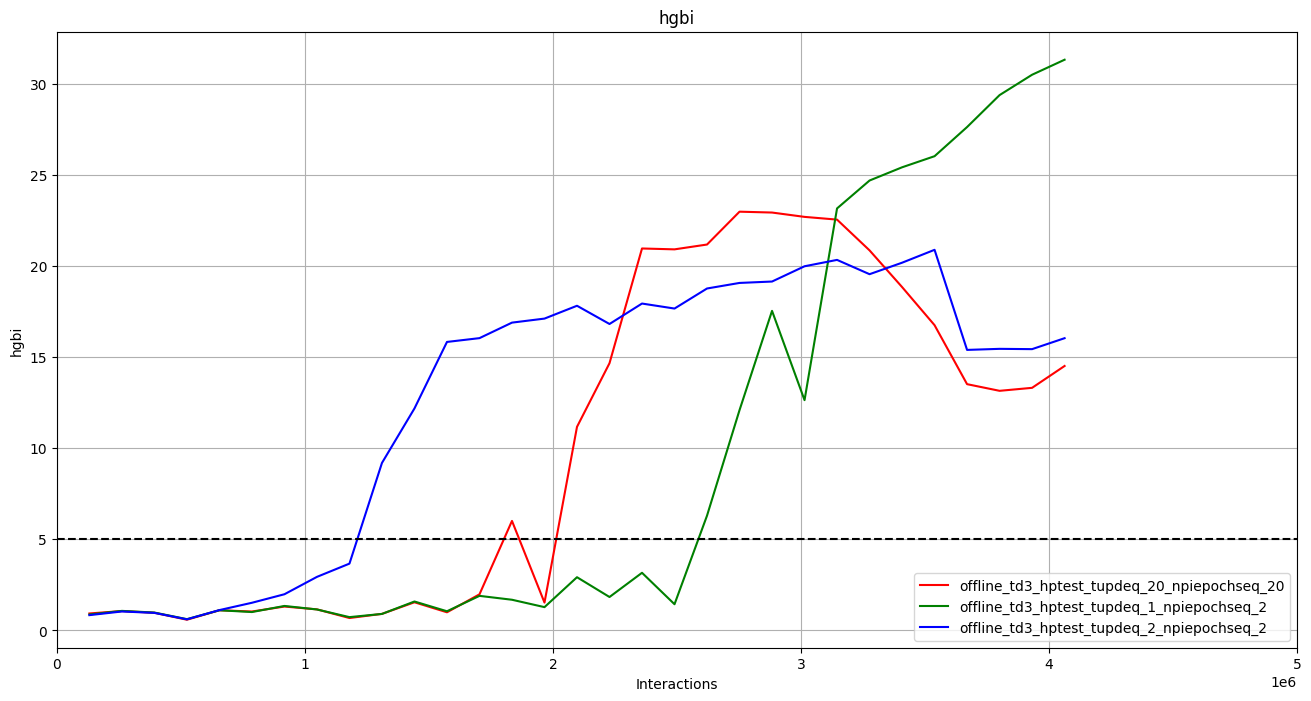

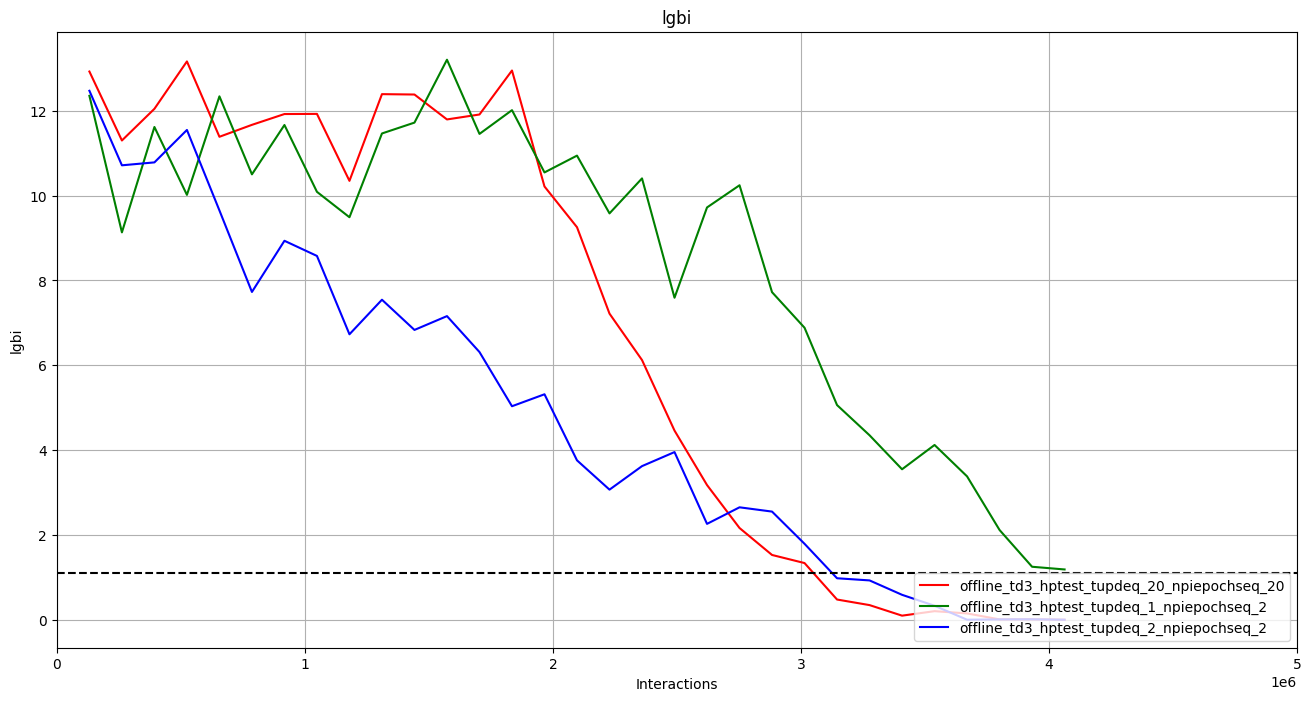

In [5]:
import os
import sys
import json
import numpy as np
import pandas as pd
from decouple import config
MAIN_PATH = config('MAIN_PATH')
sys.path.insert(1, MAIN_PATH)
from visualiser.core import ExperimentVisualise, plot_testing_rewards, plot_training_logs, plot_value_function
from visualiser.core import plot_episode, plot_training_action_summary, plot_training_logs
from visualiser.core import display_commands, plot_testing_metric, display_commands_v2, plot_testing_average_metric
import matplotlib.gridspec
%matplotlib inline 

# FOLDER = 'nci/May12/adult_easy/'
# ALGO = 'G'
# SUBJECT = '6'
# PATH = FOLDER+ALGO+SUBJECT
# COHORT = 'Adult'

# EXP_NAME = 'offline_td3_debug' offline_td3_clinical
# EXP_NAME   = 'offline_td3_test_mixed1'   
# EXP_NAME_2 = "offline_td3_test_mixed2" 
# EXP_NAME_3 = "offline_td3_test_mixed3" 

# EXP_NAME   = 'offline_td3_test_full_q'   
# EXP_NAME_2 = "offline_td3_test_bc" 
# EXP_NAME_3 = "offline_td3_test_mixed2" 

#offline_td3_p19_4
EXP_NAME = 'offline_td3_hptest_tupdeq_20_npiepochseq_20'
EXP_NAME_2 = "offline_td3_hptest_tupdeq_1_npiepochseq_2" 
EXP_NAME_3 = "offline_td3_hptest_tupdeq_2_npiepochseq_2" 

COHORT = 'Adult'
SUBJECT = '0'

LABEL = COHORT+SUBJECT

SINGLE_VIEW = False


command = []
dis_len = 5.0 * 1000000 #1.0 * 1000000 /2 
disp_arr = display_commands_v2(command)


if SINGLE_VIEW:
    exp1 = ExperimentVisualise(id=EXP_NAME, version=1.1, plot_version=1, test_seeds=5000)

    exp_vis = {
                '1':{ "id":exp1, "color":'r',"show": disp_arr[1], "label":LABEL},
    }

    
    plot_testing_average_metric(exp_vis, [['1']], type='normal', dis_len=dis_len, metric='reward', goal=312, fill=True)

else:
    exp1 = ExperimentVisualise(id=EXP_NAME, version=1.1, plot_version=1, test_seeds=5000)
    exp2 = ExperimentVisualise(id=EXP_NAME_2, version=1.1, plot_version=1, test_seeds=5000)
    exp3 = ExperimentVisualise(id=EXP_NAME_3, version=1.1, plot_version=1, test_seeds=5000)

    exp_vis = {
                '1':{ "id":exp1, "color":'r',"show": disp_arr[1], "label":exp1.id}, 
                '2':{ "id":exp2, "color":'g',"show": disp_arr[2], "label":exp2.id},  
                '3':{ "id":exp3, "color":'b',"show": disp_arr[3], "label":exp3.id}, 
    }

    plot_testing_average_metric({'1' : exp_vis['1']}, [['1']], type='normal', dis_len=dis_len, metric='reward', goal=312, fill=True)


# plot the graphs

# average metric


print(exp_vis['1'])


#individual seed metrics
plot_testing_metric(exp_vis, type='normal', dis_len=dis_len, metric='reward', goal=312, fill=False, label=False)  # normal
#plot_training_logs(exp_vis, dis_len, version=3)


# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='value_grad', goal=5, fill=False)
# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='val_loss', goal=1.1, fill=False)

params = ['policy_grad', 'explained_var', 'true_var','val_loss', 'value_grad'] #, 'pi_loss'
plot_training_logs(mode='ppo', exp_dict=exp_vis, dis_len=dis_len, params=params)
# params = ['pi_aux_grad'] #'pi_aux_loss', 'vf_aux_loss', vf_aux_grad 
# plot_training_logs(mode='aux', exp_dict=exp_vis, dis_len=250, params=params)
# params = ['plan_grad', 'plan_loss'] 
# plot_training_logs(mode='planning', exp_dict=exp_vis, dis_len=250, params=params)    


plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='aBGP_rmse', goal=15, fill=False)
#plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='cBGP_rmse', goal=10, fill=False)
# plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='normo', goal=70, fill=False)  # normal
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='ri', goal=5, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='hgbi', goal=5, fill=False)
plot_testing_metric(exp_vis, type='min_max', dis_len=dis_len, metric='lgbi', goal=1.1, fill=False)


 Experiment summary...
{'epi': {30: 31}, 't': {30: 179}, 'reward': {30: 152.39441}, 'normo': {30: 59.21787709497207}, 'hypo': {30: 0.0}, 'sev_hypo': {30: 0.0}, 'hyper': {30: 17.318435754189945}, 'lgbi': {30: 0.0}, 'hgbi': {30: 14.855732}, 'ri': {30: 14.855732}, 'sev_hyper': {30: 23.463687150837988}, 'aBGP_rmse': {30: 0}, 'cBGP_rmse': {30: 0}}
{'epi': {30: 31}, 't': {30: 178}, 'reward': {30: 152.18881}, 'normo': {30: 56.741573033707866}, 'hypo': {30: 0.0}, 'sev_hypo': {30: 0.0}, 'hyper': {30: 19.662921348314608}, 'lgbi': {30: 0.0}, 'hgbi': {30: 14.493138}, 'ri': {30: 14.493138}, 'sev_hyper': {30: 23.59550561797753}, 'aBGP_rmse': {30: 0}, 'cBGP_rmse': {30: 0}}
{'epi': {30: 31}, 't': {30: 177}, 'reward': {30: 152.54639}, 'normo': {30: 61.01694915254237}, 'hypo': {30: 0.0}, 'sev_hypo': {30: 0.0}, 'hyper': {30: 15.254237288135592}, 'lgbi': {30: 0.0}, 'hgbi': {30: 13.808424}, 'ri': {30: 13.808424}, 'sev_hyper': {30: 23.728813559322035}, 'aBGP_rmse': {30: 0}, 'cBGP_rmse': {30: 0}}
{'epi': {3

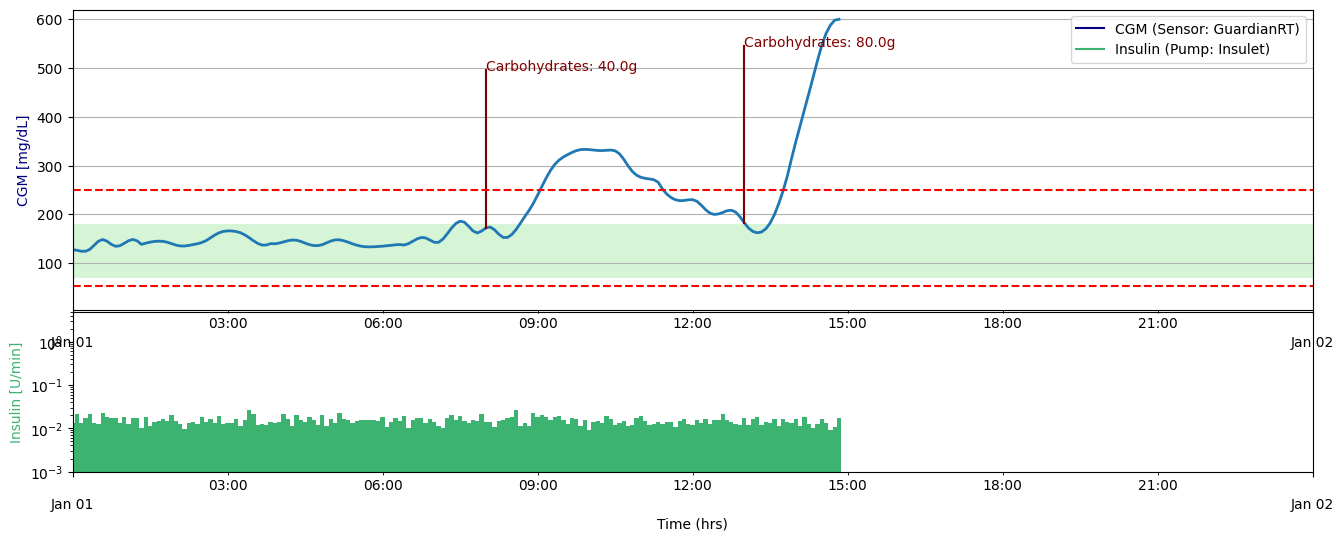

/testing/worker_episode_5001.csv


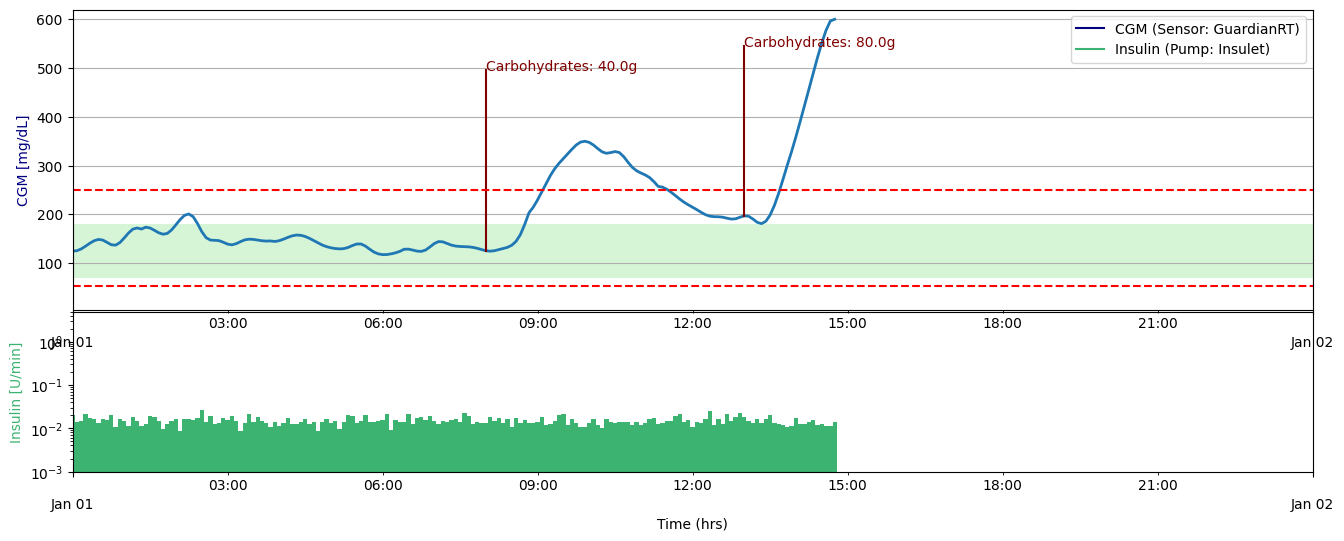

/testing/worker_episode_5002.csv


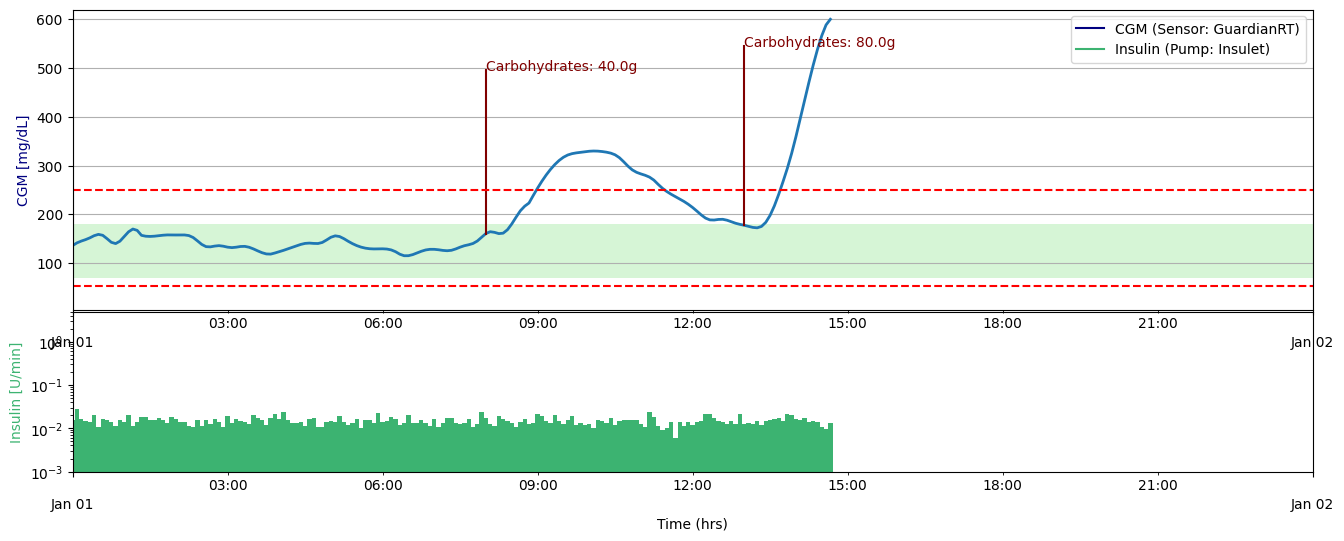

/testing/worker_episode_5003.csv


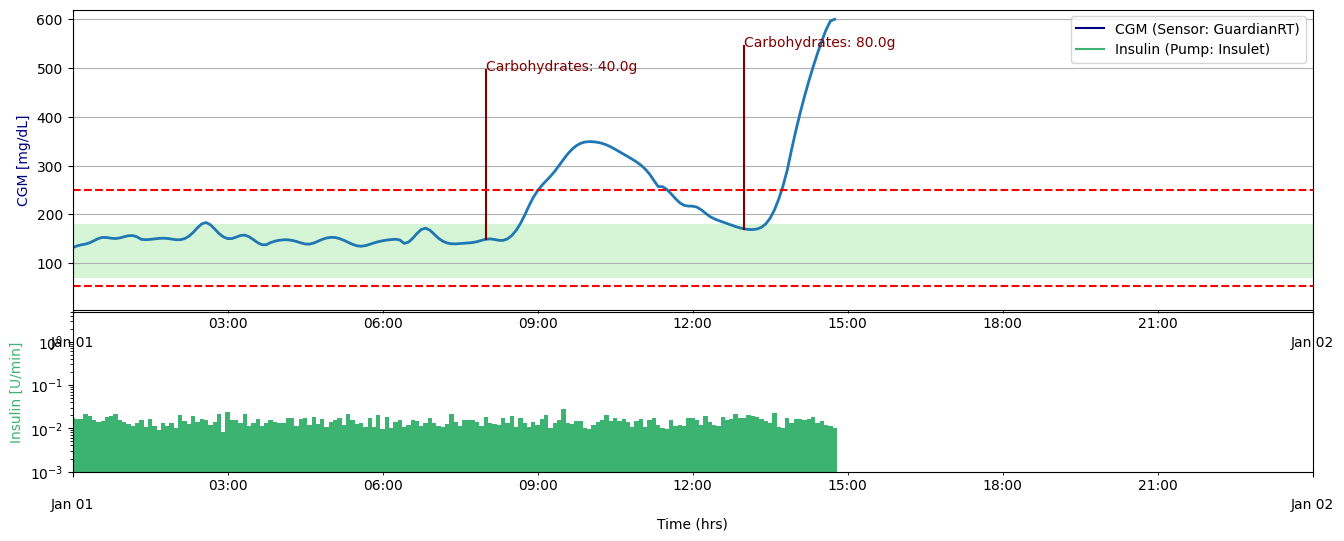

FileNotFoundError: [Errno 2] No such file or directory: '../../results/offline_td3_hptest_tupdeq_20_npiepochseq_20/training/worker_episode_0.csv'

In [4]:

## debugging a given experiment
target_exp = exp1
latest_epi = target_exp.get_summary()
target_epi = latest_epi
# plot_value_function(target_exp, horizon=256)
for t in range(0, target_exp.testing_workers):
    plot_episode(target_exp, tester=t, episode=target_epi)
plot_training_action_summary(target_exp, horizon=256)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


filter_bad = False

target_metrics = ['normo', 'hypo', 'hyper', 'sev_hypo', 'sev_hyper', 'lgbi', 'hgbi', 'ri']
FOLDER_PATH='/results/embc14_real'
control_type = 'real'
f1 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f1[f1['survival'] < 312].count()['survival']
print('real')
print(failures)
if filter_bad:
    f1 = f1[f1['survival'] == 312]
t1 = f1[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t1)

FOLDER_PATH='/results/embc14_quadratic'
control_type = 'quadratic'
f2 = pd.read_csv(MAIN_PATH +FOLDER_PATH+ '/'+control_type+'.csv')
failures = f2[f2['survival'] < 312].count()['survival']
print('quadratic')
print(failures)
if filter_bad:
    f2 = f2[f2['survival'] == 312]
t2 = f2[target_metrics].describe().loc[['mean', 'std', 'min', 'max']]
print(t2)

if filter_bad:
    sum_stats = sum_stats[sum_stats['t'] == 312]
c = sns.color_palette() 

fig = plt.figure(figsize=(8, 6))
plt.subplot(3, 3, 1)
g2 = sns.violinplot(y=f1['normo'])
g2.set(ylabel="TIR")
g2.set(ylim=(0, 100))
plt.title("SBB")

plt.subplot(3, 3, 2)
g2 = sns.violinplot(y=f2['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("SBBHE")
#plt.ylabel()

plt.subplot(3, 3, 3)
g2 = sns.violinplot(y=sum_stats['normo'])
g2.set(ylabel=None)
g2.set(ylim=(0, 100))
plt.title("Proposed Method")

plt.subplot(3, 3, 4)
g2 = sns.violinplot(y=f1['lgbi'], color=c[1])
g2.set(ylabel="LBGI")
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 5)
g2 = sns.violinplot(y=f2['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 6)
g2 = sns.violinplot(y=sum_stats['lgbi'], color=c[1])
g2.set(ylabel=None)
g2.set(ylim=(0, 20))

plt.subplot(3, 3, 7)
g2 = sns.violinplot(y=f1['hgbi'], color=c[2])
g2.set(ylabel="HBGI")
g2.set(ylim=(0, 40))


plt.subplot(3, 3, 8)
g2 = sns.violinplot(y=f2['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

plt.subplot(3, 3, 9)
g2 = sns.violinplot(y=sum_stats['hgbi'], color=c[2])
g2.set(ylabel=None)
g2.set(ylim=(0, 40))

# sns.violinplot(y=sum_stats['normo'])
#axes.violinplot(dataset = [sum_stats['normo'].values],  showmedians=True, showmeans=True)
# axes.set_xticks([1])
# axes.set_xticklabels(["Normoglyceamia", ])
plt.show()


# boxplot = sum_stats.boxplot(column=['normo', 'lgbi', 'hgbi'])
# fig, axes = plt.subplots()
# axes.violinplot(dataset = [sum_stats['lgbi'].values, sum_stats['hgbi'].values], showmedians=True)
# plt.show()

ModuleNotFoundError: No module named 'seaborn'